## Lab 2 – Computational Methods

## Part 1: Black-body radiation

The Planck radiation law describes the spectral density of radiation emitted by a black body in equilibrium.  
Before it was derived, others had noted that peak of the distribution changed as a function of temperature.   
This is the reason, for example, why a piece of metal glows 'red hot' at certain temperatures, but at very high temperatures glows 'white hot'.

Wilhelm Wien derived a relationship between temperature and the wavelength at which the black body spectral radiance peaks
$$ \lambda_{\rm max} = \frac{b}{T}$$
where $b$ is the _Wien displacement constant_.

Later, the Planck radiation law gave an exact expression for the black body spectral radiance (per unit wavelength) at a given temperature and wavelength:

$$ u (\lambda, T) = \frac{2 h c^2}{\lambda^5} \frac{1}{e^{h c / \lambda k_B T} - 1} $$

In this exercise, we will use the Planck expression to estimate the value of $b$.


### Exercise 1
Define a function which returns the Planck radiation law as a function of wavelength and temperature.   
Plot the curve (in the range $10$ nm $<\lambda<1200$ nm) for several values of temperature in the range $3000$ K $< 8000$ K .

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
h = constants.Planck
c = constants.speed_of_light
kB = constants.Boltzmann

def radiance(wl, temp):
    return 2*h*c**2/wl**5*(np.exp(h*c/(wl*kB*temp)-1)**(-1))

<>:6: SyntaxWarning: invalid escape sequence '\,'
<>:6: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipykernel_5657/4189800613.py:6: SyntaxWarning: invalid escape sequence '\,'
  ax.plot(wls, radiance(wls, temp), label=r'$T='+str(int(temp))+'\,\mathrm{K}$')


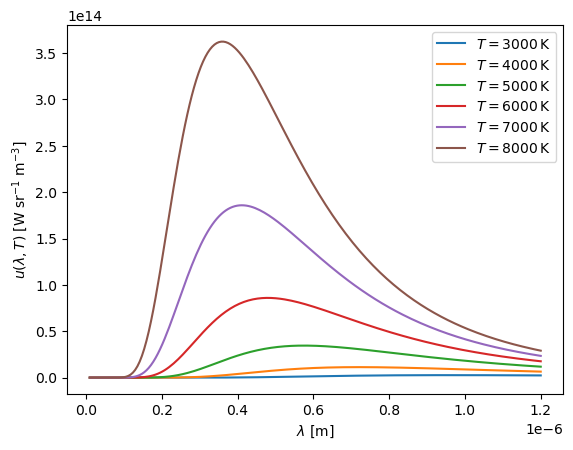

In [2]:
wls = np.linspace(1E-8, 1.2E-6, 200)
Ts = np.linspace(3000, 8000, 6)

fig, ax = plt.subplots()
for temp in Ts:
    ax.plot(wls, radiance(wls, temp), label=r'$T='+str(int(temp))+'\,\mathrm{K}$')
    
        
## set appropriate axis ticks and labels
        
ax.legend()
ax.set_xlabel('$\\lambda$ [m]')
ax.set_ylabel('$u(\\lambda,T)$ [W sr$^{-1}$ m$^{-3}$]')

plt.show()

### Exercise 2
Write a function which uses the scipy library to find the wavelength for which the Planck expression is maximum at a given temperature.   
Replot the figure above, this time also indicating the maximum point.

In [3]:
from scipy.optimize import minimize

In [4]:
# Function to find the maximum wavelength and corresponding spectral radiance
def minus_radiance(wl, temp):
    return -radiance(wl, temp)

def find_max_wl(temp):
    fmin = minimize(lambda x: minus_radiance(x, temp), 1E-6, method = 'Nelder-Mead', tol = 1E-16)
    return fmin.x[0], -fmin.fun

In [5]:
# Find positions of the maxima for each T
maxs = [find_max_wl(T) for T in Ts]

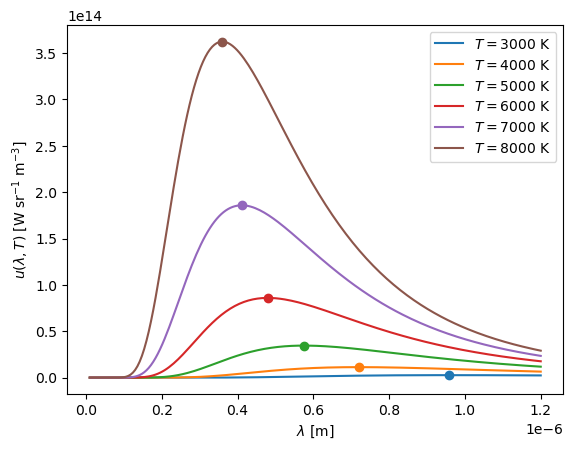

In [6]:
# Plot the results 
fig, ax = plt.subplots()
for ii, temp in enumerate(Ts):
    line, = ax.plot(wls, radiance(wls, temp), label=r'$T='+str(int(temp))+' ~\\mathrm{K}$')
    ax.plot(maxs[ii][0], maxs[ii][1], 'o', color = line.get_color())

ax.legend()
ax.set_xlabel('$\\lambda$ [m]')
ax.set_ylabel('$u(\\lambda,T)$ [W sr$^{-1}$ m$^{-3}$]')

plt.show()

## Homework assignment

### Q1.
Use the function defined above to generate a longer array of $T$ and corresponding $\lambda_{\rm max}$ values in the same range.

Use least square fitting methods in scipy to estimate the Wien displacement constant $b$.

Plot the fit, and compare the estimated and true values of $b$.

In [7]:
from scipy.optimize import least_squares
b_true = constants.Wien
print(b_true)

0.002897771955


In [8]:
# Longer array of temperatures
T2s = np.linspace(3000, 8000,200)

# Find the maxima
max2s = [find_max_wl(T) for T in T2s]


In [9]:
# Function we are fitting to
def fun_to_fit(T, b):
    return b/T

# Residuals function (difference between model and data)
def residuals(b, T, wl):
    return fun_to_fit(T, b) - wl

In [10]:
p0 = 1E-2
fitting = least_squares(residuals, p0, args=(T2s, [max2[0] for max2 in max2s]), max_nfev=10000)

print(fitting.x[0], b_true)

0.002877553755520063 0.002897771955


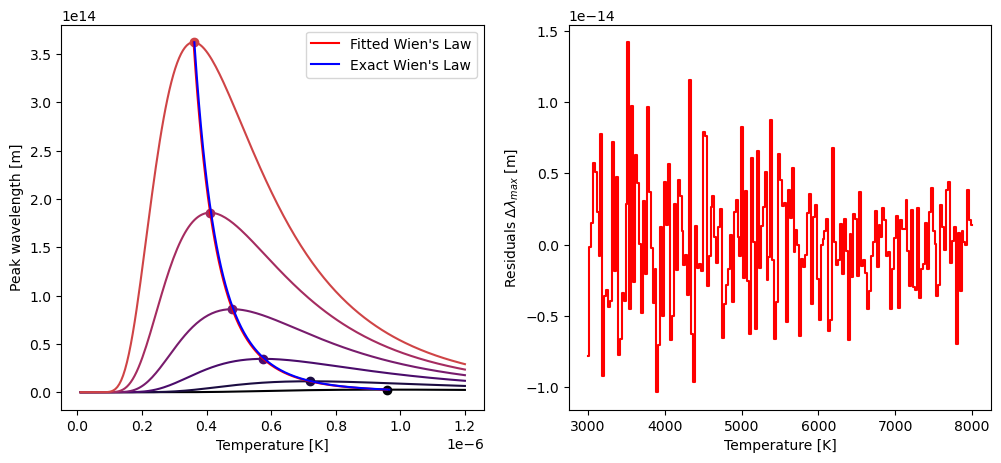

In [11]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
# plt.tight_layout()

colors = plt.cm.inferno(np.linspace(0, 1, 10))
for ii, temp in enumerate(Ts):
    line, = ax[0].plot(wls, radiance(wls, temp), color=colors[ii])
    ax[0].plot(maxs[ii][0], maxs[ii][1], 'o', color = line.get_color())

est_l_maxs = fun_to_fit(T2s, fitting.x[0])
exact_l_maxs = fun_to_fit(T2s, b_true)
rad_of_fit = radiance(est_l_maxs, T2s)
rad_of_exact = radiance(exact_l_maxs, T2s)
line2, = ax[0].plot(est_l_maxs, rad_of_fit, color='red', label='Fitted Wien\'s Law')
line3, = ax[0].plot(exact_l_maxs, rad_of_exact, color='blue', label='Exact Wien\'s Law')

ax[0].legend()
ax[0].set_ylabel('Peak wavelength [m]')
ax[0].set_xlabel('Temperature [K]')

line4, = ax[1].plot(T2s, residuals(fitting.x[0], T2s, [max2[0] for max2 in max2s]), drawstyle='steps-mid', color='red', label='Residuals of fitted Wien\'s Law') 
ax[1].set_xlabel('Temperature [K]')
ax[1].set_ylabel('Residuals $\\Delta \\lambda_{max}$ [m]')



plt.show()

### Q2.
The total radiant power emitted per unit area (the exitance) of a large, flat black-body surface is found by integrating the spectral radiance over wavelength and over solid angle, yielding *(see below for an explanation of the factor of $\pi$)*
$$ W(T) = \pi \int_0^\infty {\rm d}\lambda \, u(\lambda,T).$$


By substituting a new integration variable $x = hc/(\lambda k_BT)$, first convince yourself _(I don't need to see your working)_ that the exitance can be written in the form
$$ W(T) = f(T) \int_0^\infty {\rm d}x \frac{x^3}{e^x-1},$$
where $f(T)$ is to be determined. Now, using the numerical integration routines in SciPy, numerically evaluate the integral over $x$. Plot $W(T)$ as a function of temperature in the same range of temperatures used above.  Show that your result agrees with the Stefan-Boltzmann law $W(T) = \sigma T^4,$ where $\sigma$ is the Stefan-Boltzmann constant.

Answer:
First, we determine $f(T)$ from our previous definition of $W(T)$ and our substitution $$ W(T) = \pi\int_0^{\infty}\mathrm{d}\lambda \frac{2hc^2}{\lambda^5}\frac{1}{e^{hc/\lambda k_B T}-1} $$
making the substitution $x = \frac{hc}{\lambda k_b T}$, $\mathrm{d}x = \frac{-hc}{\lambda^2 k_B T}\mathrm{d}\lambda$ we get $$W(T) = \frac{2\pi (k_BT)^4}{h^3c^2}\int_0^{\infty}\mathrm{d}x\frac{x^3}{e^x-1}$$
We then numerically evaluate the integral over $\left[0,\infty\right)$, and multiply together with the constant terms in $$ f(T) = \frac{2\pi k_B^4}{h^3c^2} $$ to get the value of the constant coefficient $c$ such that $W(T) = cT^4$

In [14]:
from scipy.integrate import quad
SB = constants.Stefan_Boltzmann

def func_to_integrate(x):
    return x**3/(np.exp(x)-1)

result, err = quad(func_to_integrate, 0, np.inf)


const_coeff = result*(2*np.pi/h**3/c**2*kB**4)
print(' Evaluation of Integral:'+str(result), '\n', 'Coefficient of T^4:'+str(const_coeff), '\n', 'Expected coefficient, SB constant:'+str(SB).format('e'))




 Evaluation of Integral:6.49393940226683 
 Coefficient of T^4:5.6703744191844314e-08 
 Expected coefficient, SB constant:5.670374419e-08


/tmp/ipykernel_5657/3199928454.py:5: RuntimeWarning: overflow encountered in exp
  return x**3/(np.exp(x)-1)


The value produced agrees with the literature value of the Stefan-Boltzmann constant for all given decimal places.

**Explanation:**

More precisely, writing out the integral over solid angle explicitly, we have
$$W(T) =  \int_0^{\pi/2}{\rm d}\theta \sin \theta \int_0^{2\pi} {\rm d}\phi \, \int_0^\infty {\rm d}\lambda \, u(\lambda,T) \times \cos\theta,$$
where $\theta$ and $\phi$ are the usual polar and azimuthal angle in spherical polar coordinates, which we integrate over the entire half-sphere into which the radiation is emitted ($0<\theta<\pi/2$ and $0<\phi<2\pi$). The extra factor of $\cos\theta$ arises because the intensity depends on the angle between the point of observation and the black-body surface: in particular, intensity is maximised in the direction perpendicular to the surface (defined by $\theta=0$); see the diagram [here](https://en.wikipedia.org/wiki/Stefan–Boltzmann_law#Derivation_from_Planck's_law). Evaluating the integral over the angular variables yields
$$ \int_0^{\pi/2}{\rm d}\theta \int_0^{2\pi} {\rm d}\phi \sin \theta  \cos\theta = \pi$$